# Visualización de datos relacionales

Juan Sosa PhD

Email [jcsosam@unal.edu.co](mailto:jcsosam@unal.edu.co)

GitHub https://github.com/jstats1702

Samuel Sánchez (Python y revisión R)

Email [ssanchezgu@unal.edu.co](mailto:ssanchezgu@unal.edu.co)

GitHub https://github.com/Samuel-col

In [1]:
import igraph as gr
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 1 Introducción

Aquí se considera el problema de la **visualización de redes**. 

La visualización de redes incorpora aspectos **matemáticos** y **algorítmicos** junto con **elementos estéticos**.


## 2 Elementos de visualización

El objetivo consiste en **caracterizar visualmente datos relacionales** asociados con un grafo $G=(V,E)$ con vértices $V$ y aristas $E$. 

La visualización de grafos consiste en **crear representaciones geométricas de grafos** utilizando **símbolos** para los vértices $v \in V$ y **curvas suaves** para las aristas $e \in E$

Hay **infinitas maneras** en las que se puede representar $G$. Lo fundamental consiste en **comunicar adecuadamente la información relacional** contenida en $G$.

Los grafos de tamaño no trivial deben dibujarse utilizando **métodos automatizados**.

Se usan **algoritmos computacionalmente eficientes** que solucionan los **problemas de optimización** derivados de la representación automática de grafos.


## 3 Datos 

### 3.1 Lazega

Red de **relaciones de trabajo colaborativo** entre miembros de una firma de abogados (SG&R). 

Un enlace indica que los miembros de la firma han trabajado juntos en al menos un caso.

***Lazega, E. (2001). The collegial phenomenon: The social mechanisms of cooperation among peers in a corporate law partnership. Oxford University Press on Demand.***

Disponible en el paquete `sand` de R.

https://www.stats.ox.ac.uk/~snijders/siena/Lazega_lawyers_data.htm



In [2]:
# grafo
lazega = gr.Graph.Read_Adjacency('LazegaLawyers/ELwork36.dat', sep = ' ', mode = 'undirected')
# orden
lazega.vcount()

36

In [3]:
# El paquete sand de R retira los vértices aislados (V8 y V23).
# Aquí asignaremos nombres y luego retiraremos los mismos dos nodos.
lazega.vs['name'] = ['V' + str(k+1) for k in range(lazega.vcount())]
lazega.delete_vertices(lazega.vs.select(_degree = 0))
lazega.vcount()

34

In [4]:
# tamaño
lazega.ecount()

115

In [5]:
# dirigida?
lazega.is_directed()

False

### 3.2 Blogs de SIDA

Red de **blogs asociados con el SIDA** asociados con los pacientes y sus redes de apoyo. 

Un enlace dirigido de un blog a otro indica que el primero tiene un enlace al segundo en su página web. 

***Miller, H. J. (2007). Societies and cities in the age of instant access. In Societies and cities in the age of instant access (pp. 3-28). Springer, Dordrecht.***

Disponible en el paquete `sand` de R.

https://rdrr.io/cran/sand/man/aidsblog.html

In [6]:
# datos (importados desde el paquete sand de R)
aidsblog = gr.Graph.Read_Adjacency('aidsblog_adjacency.csv', sep = ',')
# orden
aidsblog.vcount()

146

In [7]:
# tamaño
aidsblog.ecount()

187

In [8]:
# dirigida?
aidsblog.is_directed()

True

### 3.3 Blogs de política

Red de **blogs políticos franceses** clasificados por el proyecto ***Observatoire Presidentielle*** en relación con su afiliación política. 

Un enlace indica que al menos uno de los dos blogs hace referencia al otro en su página web. 

Disponible en el paquete `sand` de R.

http://observatoire-presidentielle.fr/

https://search.r-project.org/CRAN/refmans/sand/html/fblog.html


In [9]:
# datos (importados desde el paquete sand de R)
## grafo
fblog = gr.Graph.Read_Adjacency('fblog_adjacency.csv', sep = ',', mode = 'undirected')
## Covariables
fblog_attr = pd.read_csv('fblog_attributes.csv', sep = ',')
for cov in fblog_attr.columns:
    fblog.vs[cov] = fblog_attr[cov]
# orden
fblog.vcount()

192

In [10]:
# tamaño
fblog.ecount()

1431

In [11]:
# dirigida?
fblog.is_directed()

False

### 3.4 Caltech

Red de una muestra de **usuarios de Facebook** asociados con estudiantes de Caltech.

Los enlaces representan amistades entre los usuarios.

***Red, V., Kelsic, E. D., Mucha, P. J., & Porter, M. A. (2011). Comparing community structure to characteristics in online collegiate social networks. SIAM review, 53(3), 526-543.***

Disponible en https://networkrepository.com/socfb-Caltech36.php


In [12]:
# datos
caltech_edges_array = np.genfromtxt('socfb-Caltech36/socfb-Caltech36.mtx', delimiter = ' ', skip_header = 2)
caltech_edges_array[:6,:]

array([[ 5.,  1.],
       [31.,  1.],
       [36.,  1.],
       [39.,  1.],
       [43.,  1.],
       [61.,  1.]])

In [13]:
caltech_edges_tuples = []
for i in range(caltech_edges_array.shape[0]):
    caltech_edges_tuples.append((caltech_edges_array[i,0], caltech_edges_array[i,1]))
caltech = gr.Graph.TupleList(caltech_edges_tuples, directed = False)
# orden
caltech.vcount()

769

In [14]:
caltech.ecount()

16656

In [15]:
caltech.is_directed()

False

## 4 Algunos diseños

Uno de los temas centrales de la visualización de grafos es el **diseño del grafo** (*graph layout*), i.e., la **ubicación** de los **vértices** y las **aristas** en el **espacio**, típicamente **bidimensional**.

Hay disponibles demasiadas formas de diseño, entre ellas:

- `layout_as_bipartite()`.
- `layout_as_star()`.
- `layout_as_tree()`. 
- `layout_in_circle()`.
- `layout_nicely()`.
- `layout_on_grid()`.
- `layout_on_sphere()`. 
- `layout_randomly()`.
- `layout_with_dh()`.
- `layout_with_fr()`.
- `layout_with_gem()`.
- `layout_with_graphopt()`.
- `layout_with_kk()`.
- `layout_with_lgl()`.
- `layout_with_mds()`.
- `layout_with_sugiyama()`.




### 4.1 Circular

https://igraph.org/r/doc/layout_in_circle.html

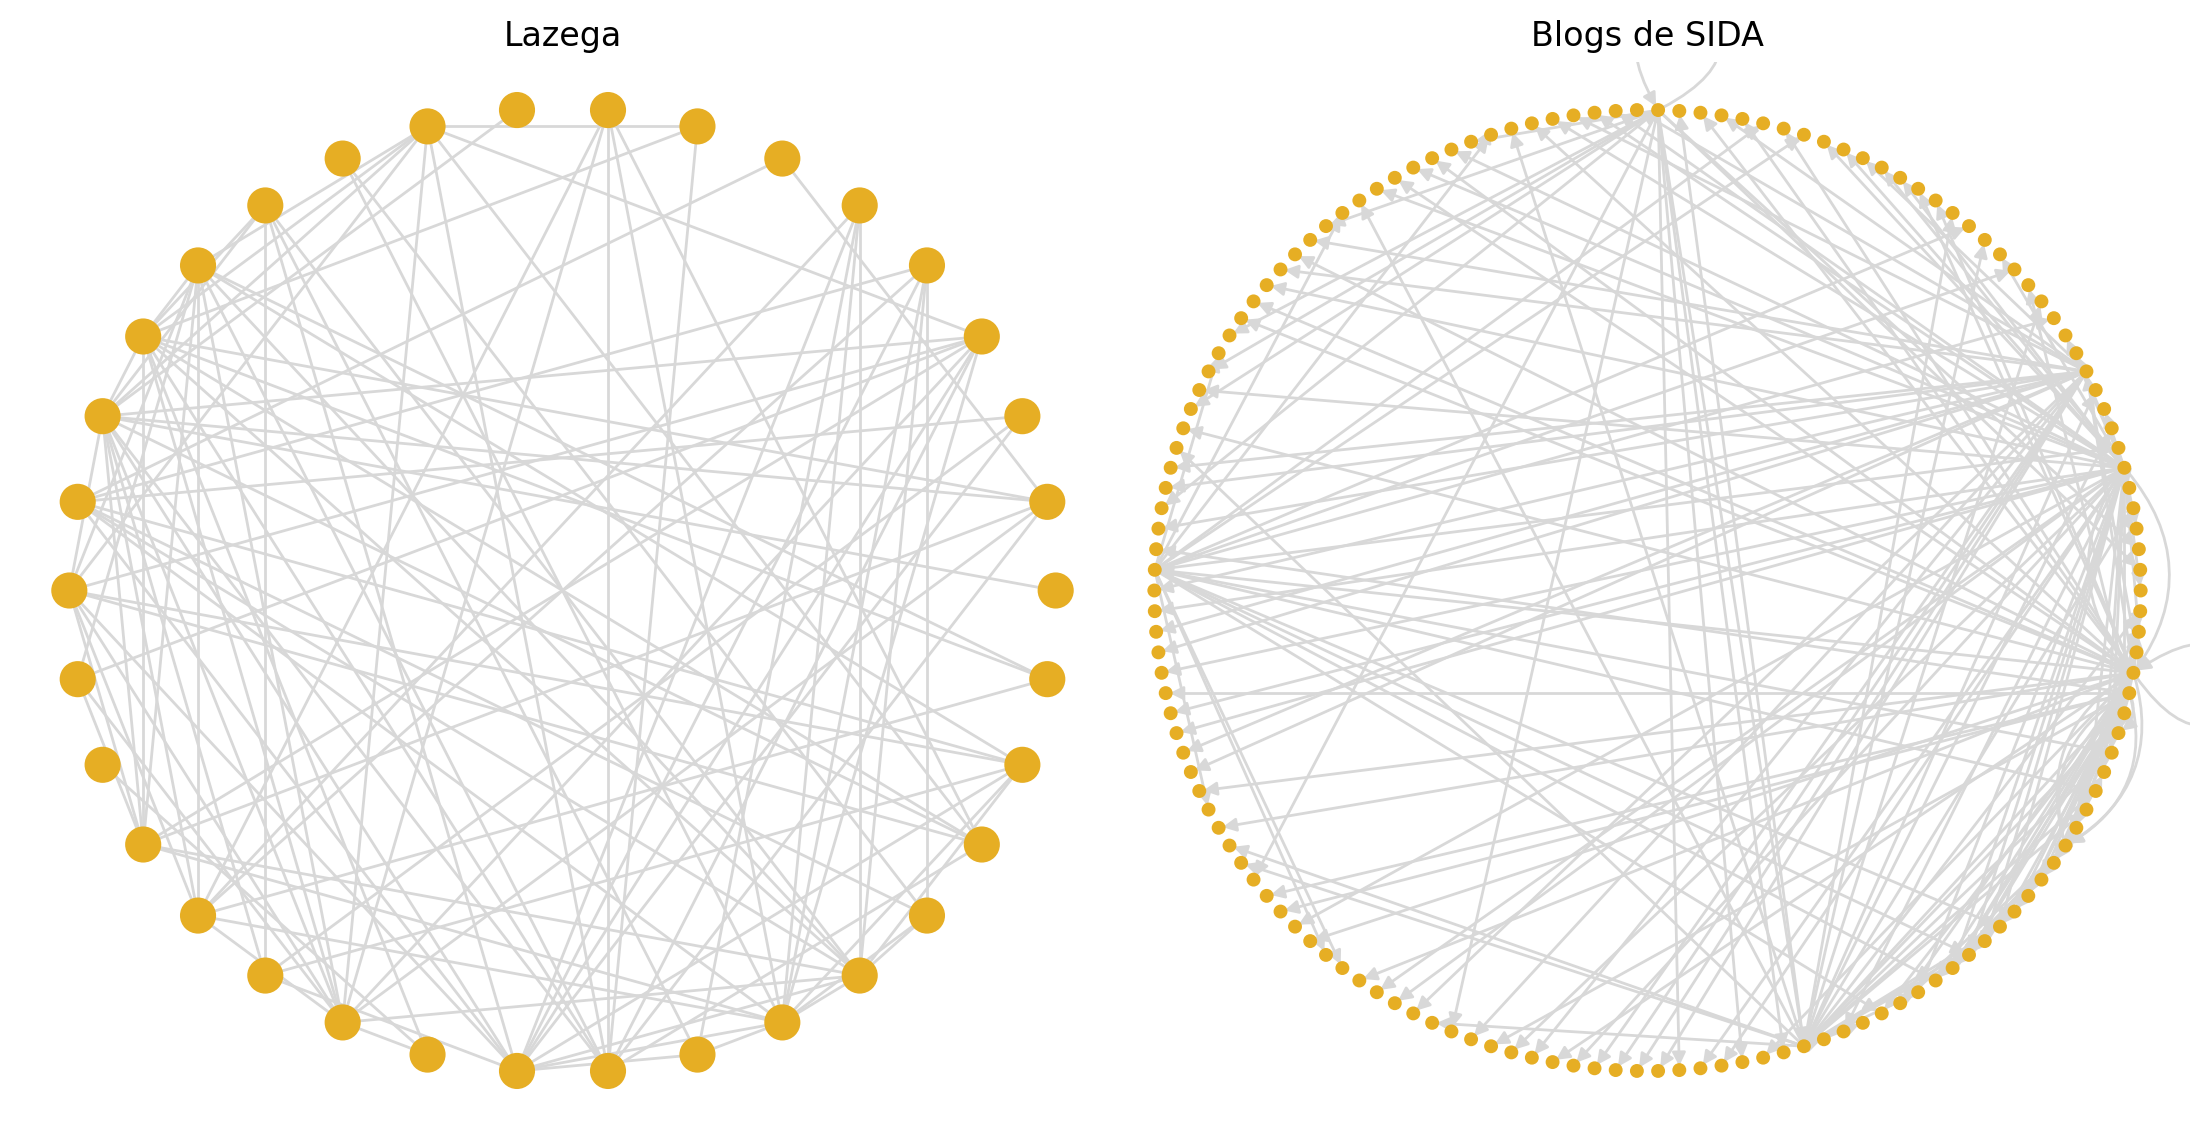

In [16]:
f, axes = plt.subplots(1, 2, figsize = (14,7), dpi = 200, clear = True)
plt.subplots_adjust(wspace = 0, hspace = 0)
arguments = {
    'vertex_color':'#E6AE24',
    'edge_color':'#D8D8D8'
}
gr.plot(lazega, layout = lazega.layout('circle'),target = axes[0], vertex_size = 12, **arguments)
gr.plot(aidsblog, layout = aidsblog.layout('circle'), target = axes[1], vertex_size = 4,**arguments)
def clean_plot_axes(axes):
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
clean_plot_axes(axes)
axes[0].set_title('Lazega')
axes[1].set_title('Blogs de SIDA')
plt.show()


### 4.2 Algoritmo de Fruchterman y Reingold

***Fruchterman, T.M.J. and Reingold, E.M. (1991). Graph Drawing by Force-directed Placement. Software - Practice and Experience, 21(11):1129-1164.***

https://igraph.org/r/doc/layout_with_fr.html

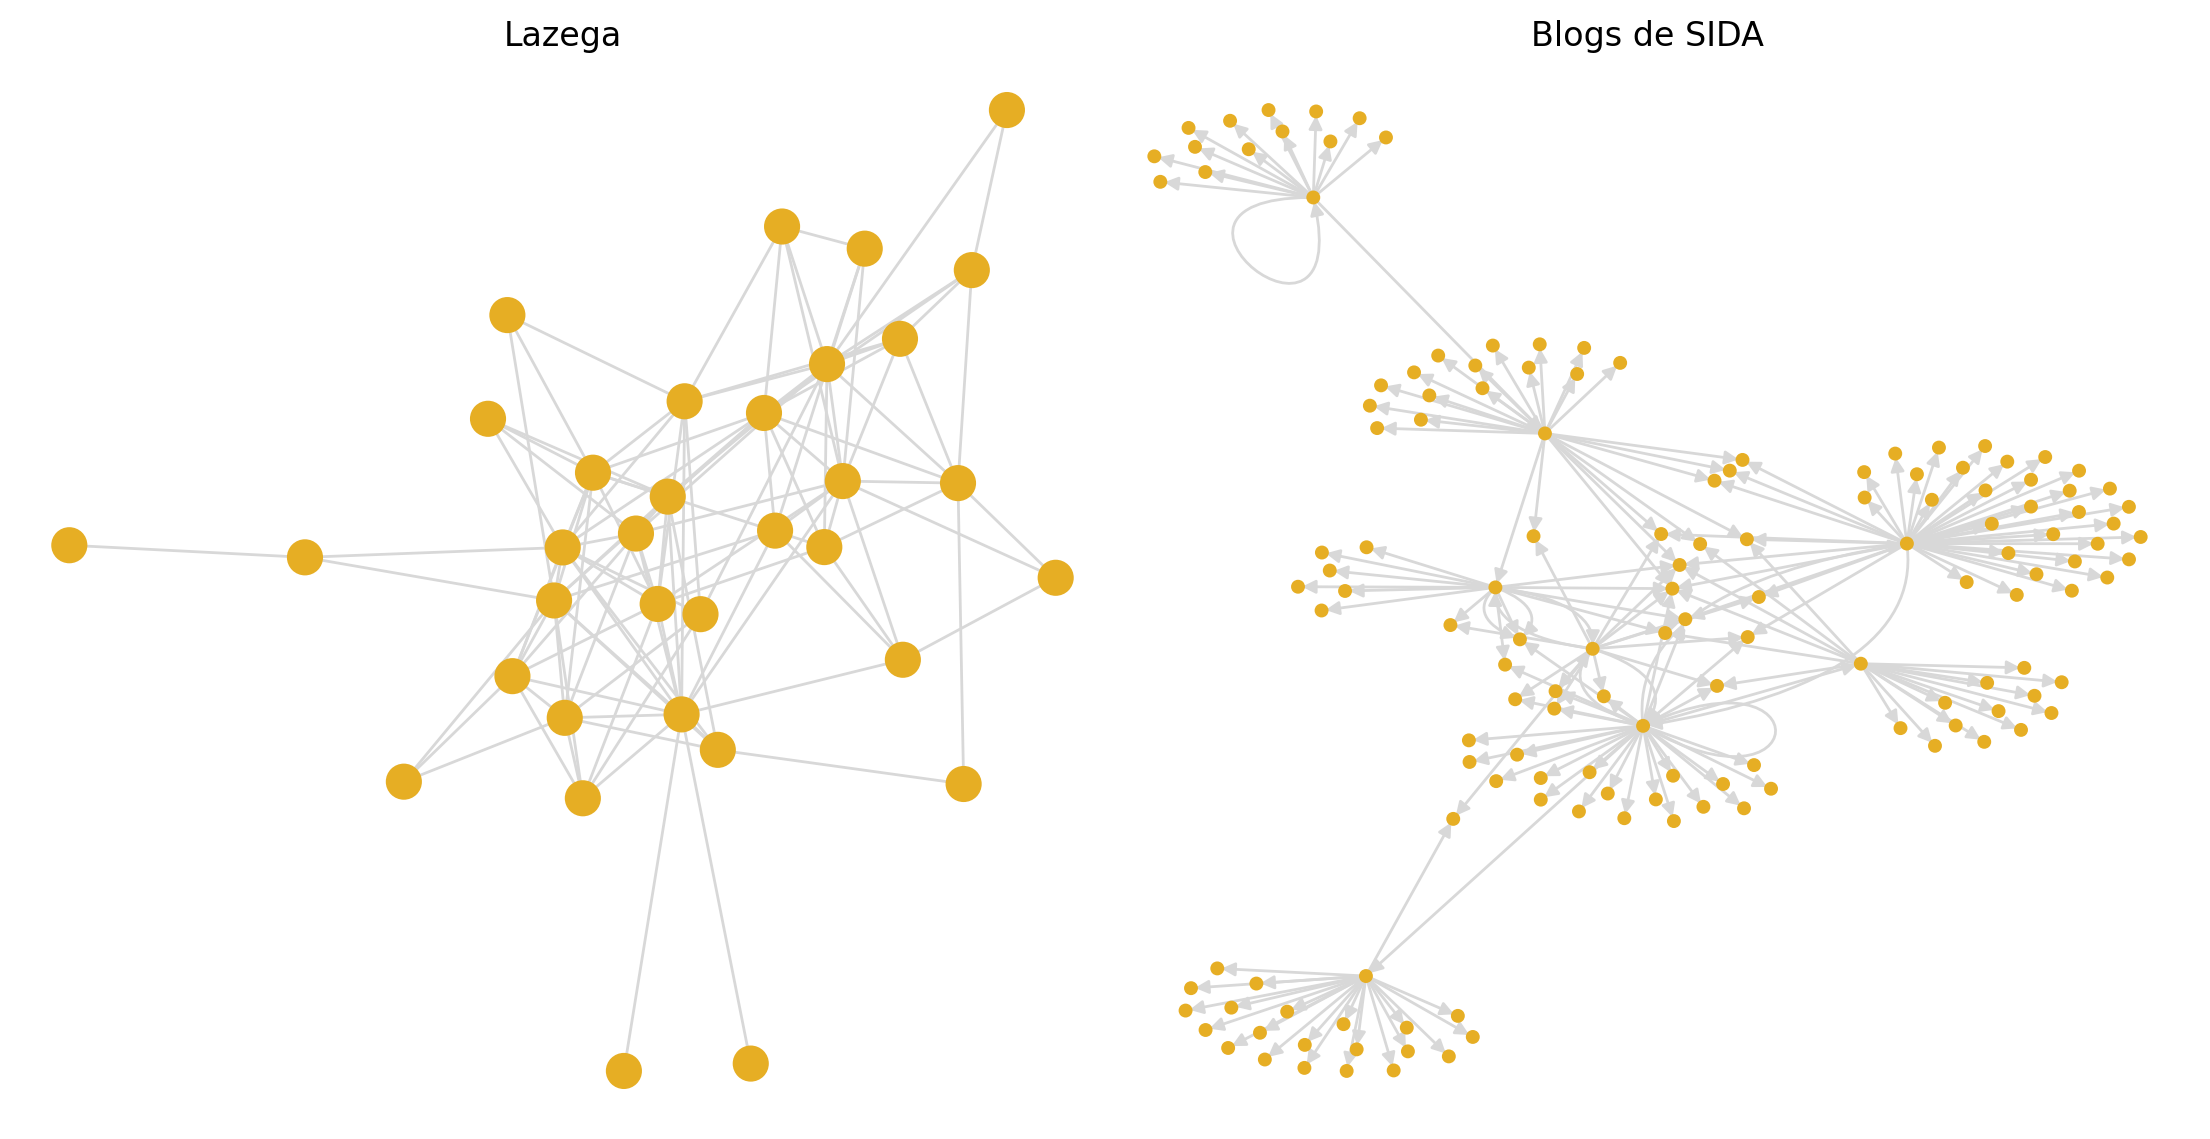

In [17]:
f, axes = plt.subplots(1, 2, figsize = (14,7), dpi = 200, clear = True)
plt.subplots_adjust(wspace = 0, hspace = 0)
arguments = {
    'vertex_color':'#E6AE24',
    'edge_color':'#D8D8D8'
}
gr.plot(lazega, layout = lazega.layout('fr'),target = axes[0], vertex_size = 12,**arguments)
gr.plot(aidsblog, layout = aidsblog.layout('fr'),target = axes[1], vertex_size = 4,**arguments)
clean_plot_axes(axes)
axes[0].set_title('Lazega')
axes[1].set_title('Blogs de SIDA')
plt.show()

### 4.3 Algoritmo de Kamada-Kawai 

***Fruchterman, T.M.J. and Reingold, E.M. (1991). Graph Drawing by Force-directed Placement. Software - Practice and Experience, 21(11):1129-1164.***

https://igraph.org/r/doc/layout_with_fr.html


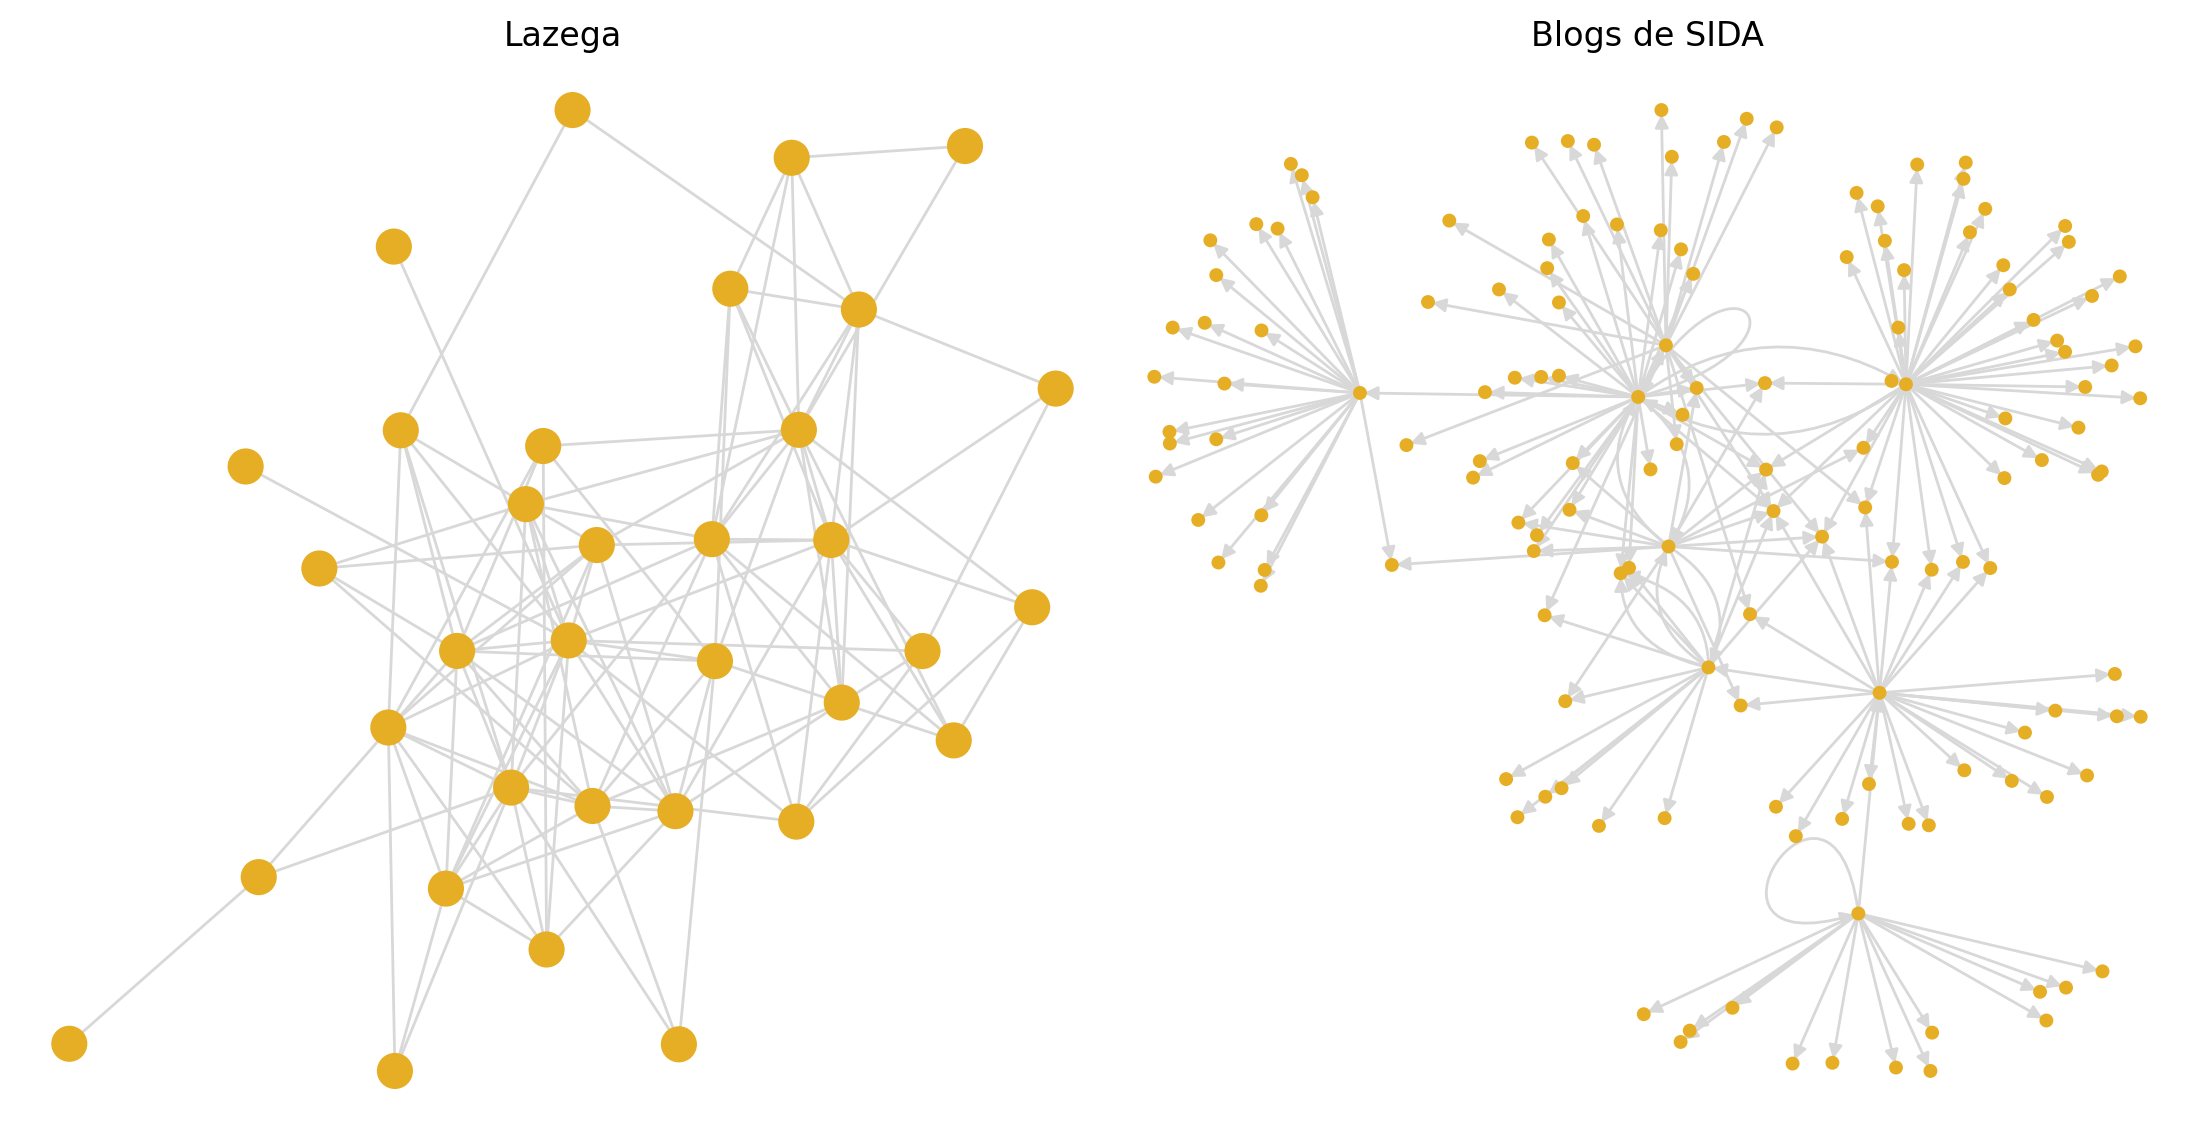

In [18]:
f, axes = plt.subplots(1, 2, figsize = (14,7), dpi = 200, clear = True)
plt.subplots_adjust(wspace = 0, hspace = 0)
arguments = {
    'vertex_color':'#E6AE24',
    'edge_color':'#D8D8D8'
}
gr.plot(lazega, layout = lazega.layout('kk'),target = axes[0], vertex_size = 12, **arguments)
gr.plot(aidsblog, layout = aidsblog.layout('kk'),target = axes[1], vertex_size = 4, **arguments)
clean_plot_axes(axes)
axes[0].set_title('Lazega')
axes[1].set_title('Blogs de SIDA')
plt.show()

### 4.4 Algoritmo de Davidson-Harel

***Ron Davidson, David Harel: Drawing Graphs Nicely Using Simulated Annealing. ACM Transactions on Graphics 15(4), pp. 301-331, 1996.***

https://igraph.org/r/doc/layout_with_dh.html


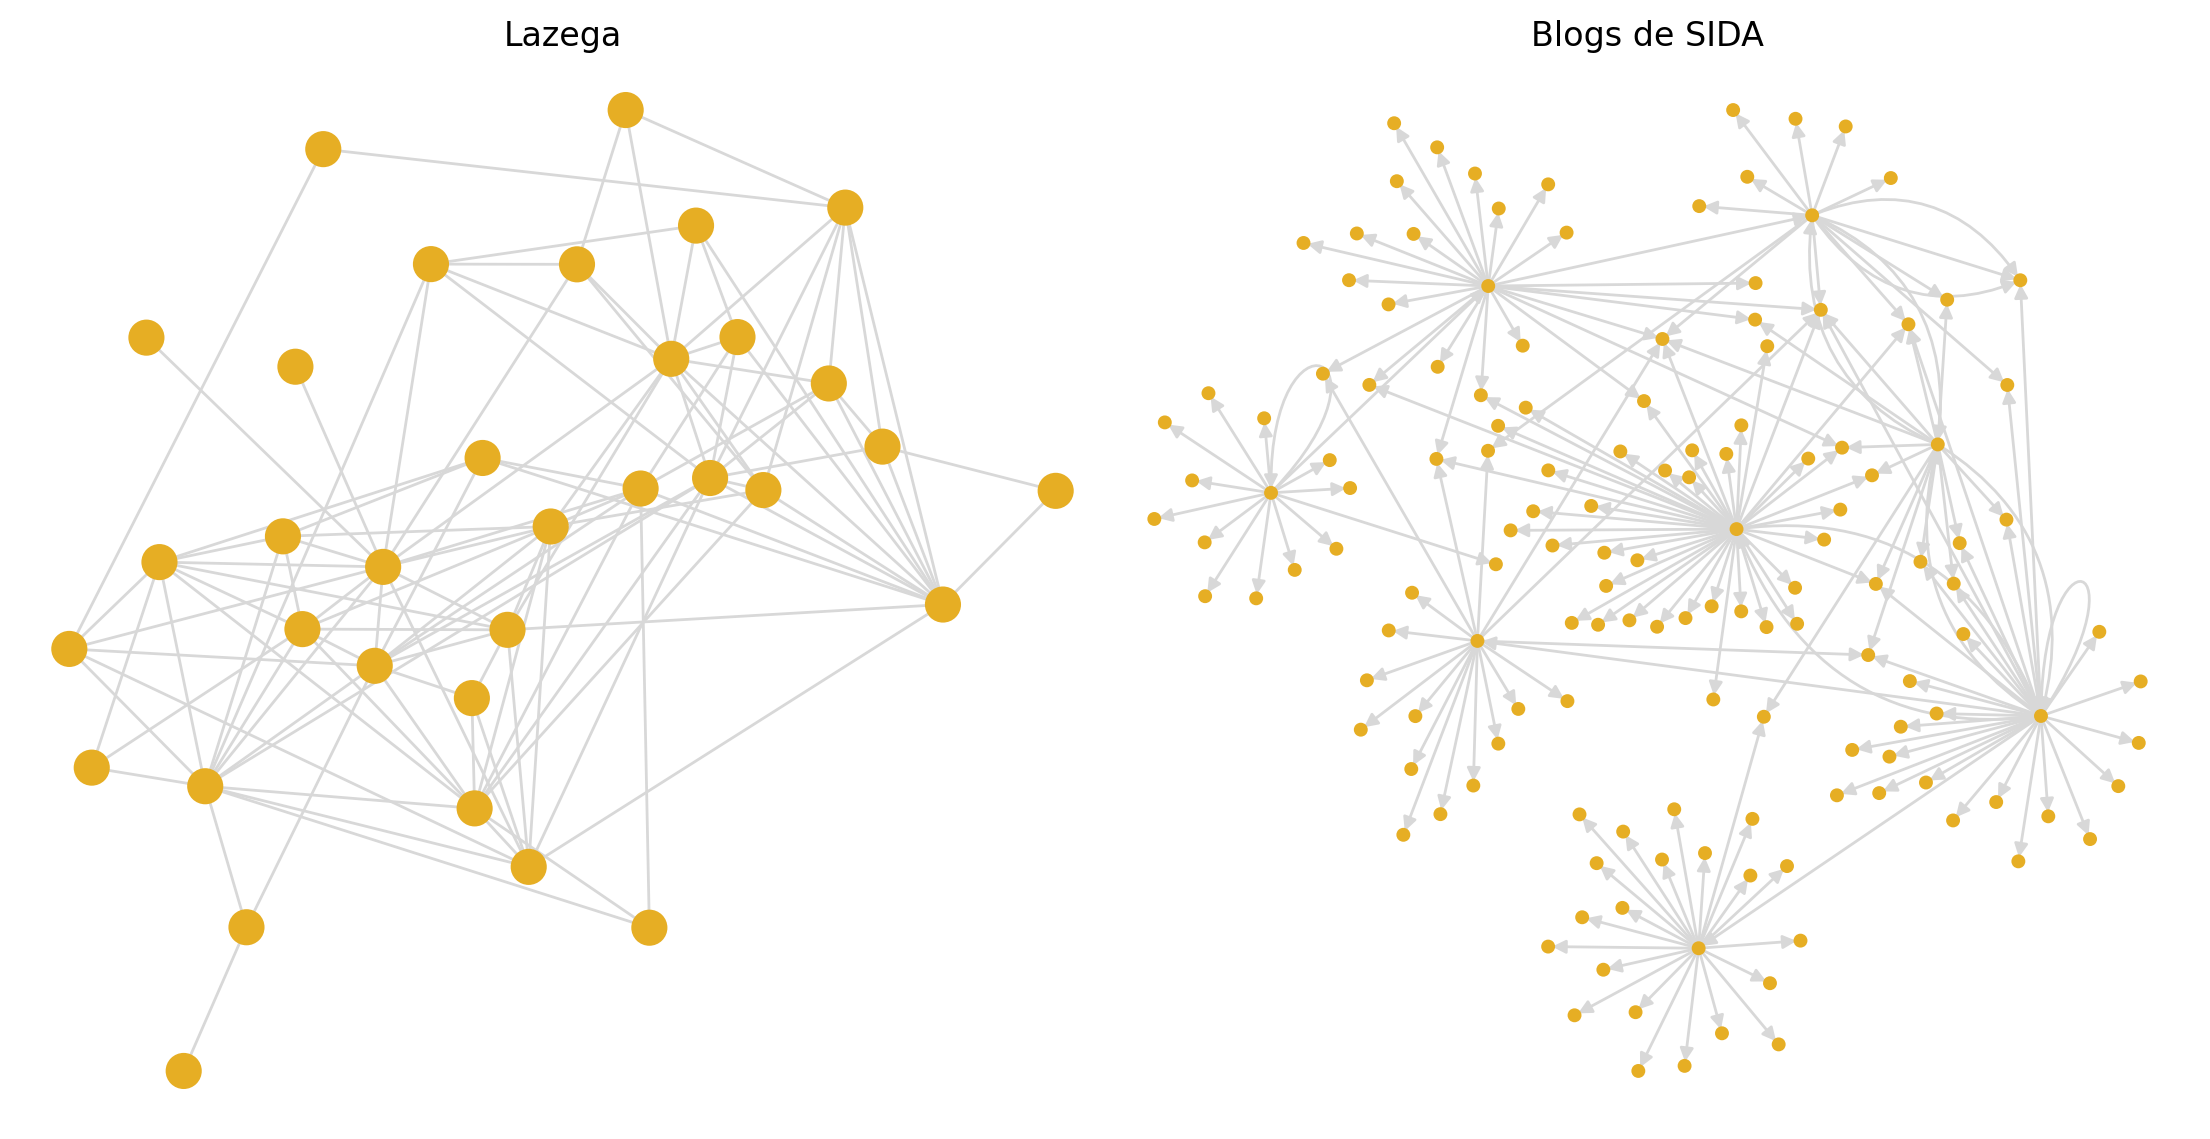

In [19]:
f, axes = plt.subplots(1, 2, figsize = (14,7), dpi = 200, clear  =True)
plt.subplots_adjust(wspace = 0, hspace = 0)
arguments = {
    'vertex_color':'#E6AE24',
    'edge_color':'#D8D8D8'
}
gr.plot(lazega, layout = lazega.layout_davidson_harel(),target = axes[0], vertex_size = 12, **arguments)
gr.plot(aidsblog, layout = aidsblog.layout_davidson_harel(),target = axes[1], vertex_size = 4, **arguments)
clean_plot_axes(axes)
axes[0].set_title('Lazega')
axes[1].set_title('Blogs de SIDA')
plt.show()

### 4.5 DrL

***Martin, S., Brown, W.M., Klavans, R., Boyack, K.W., DrL: Distributed Recursive (Graph) Layout. SAND Reports, 2008. 2936: p. 1-10.***

https://igraph.org/r/doc/layout_with_drl.html

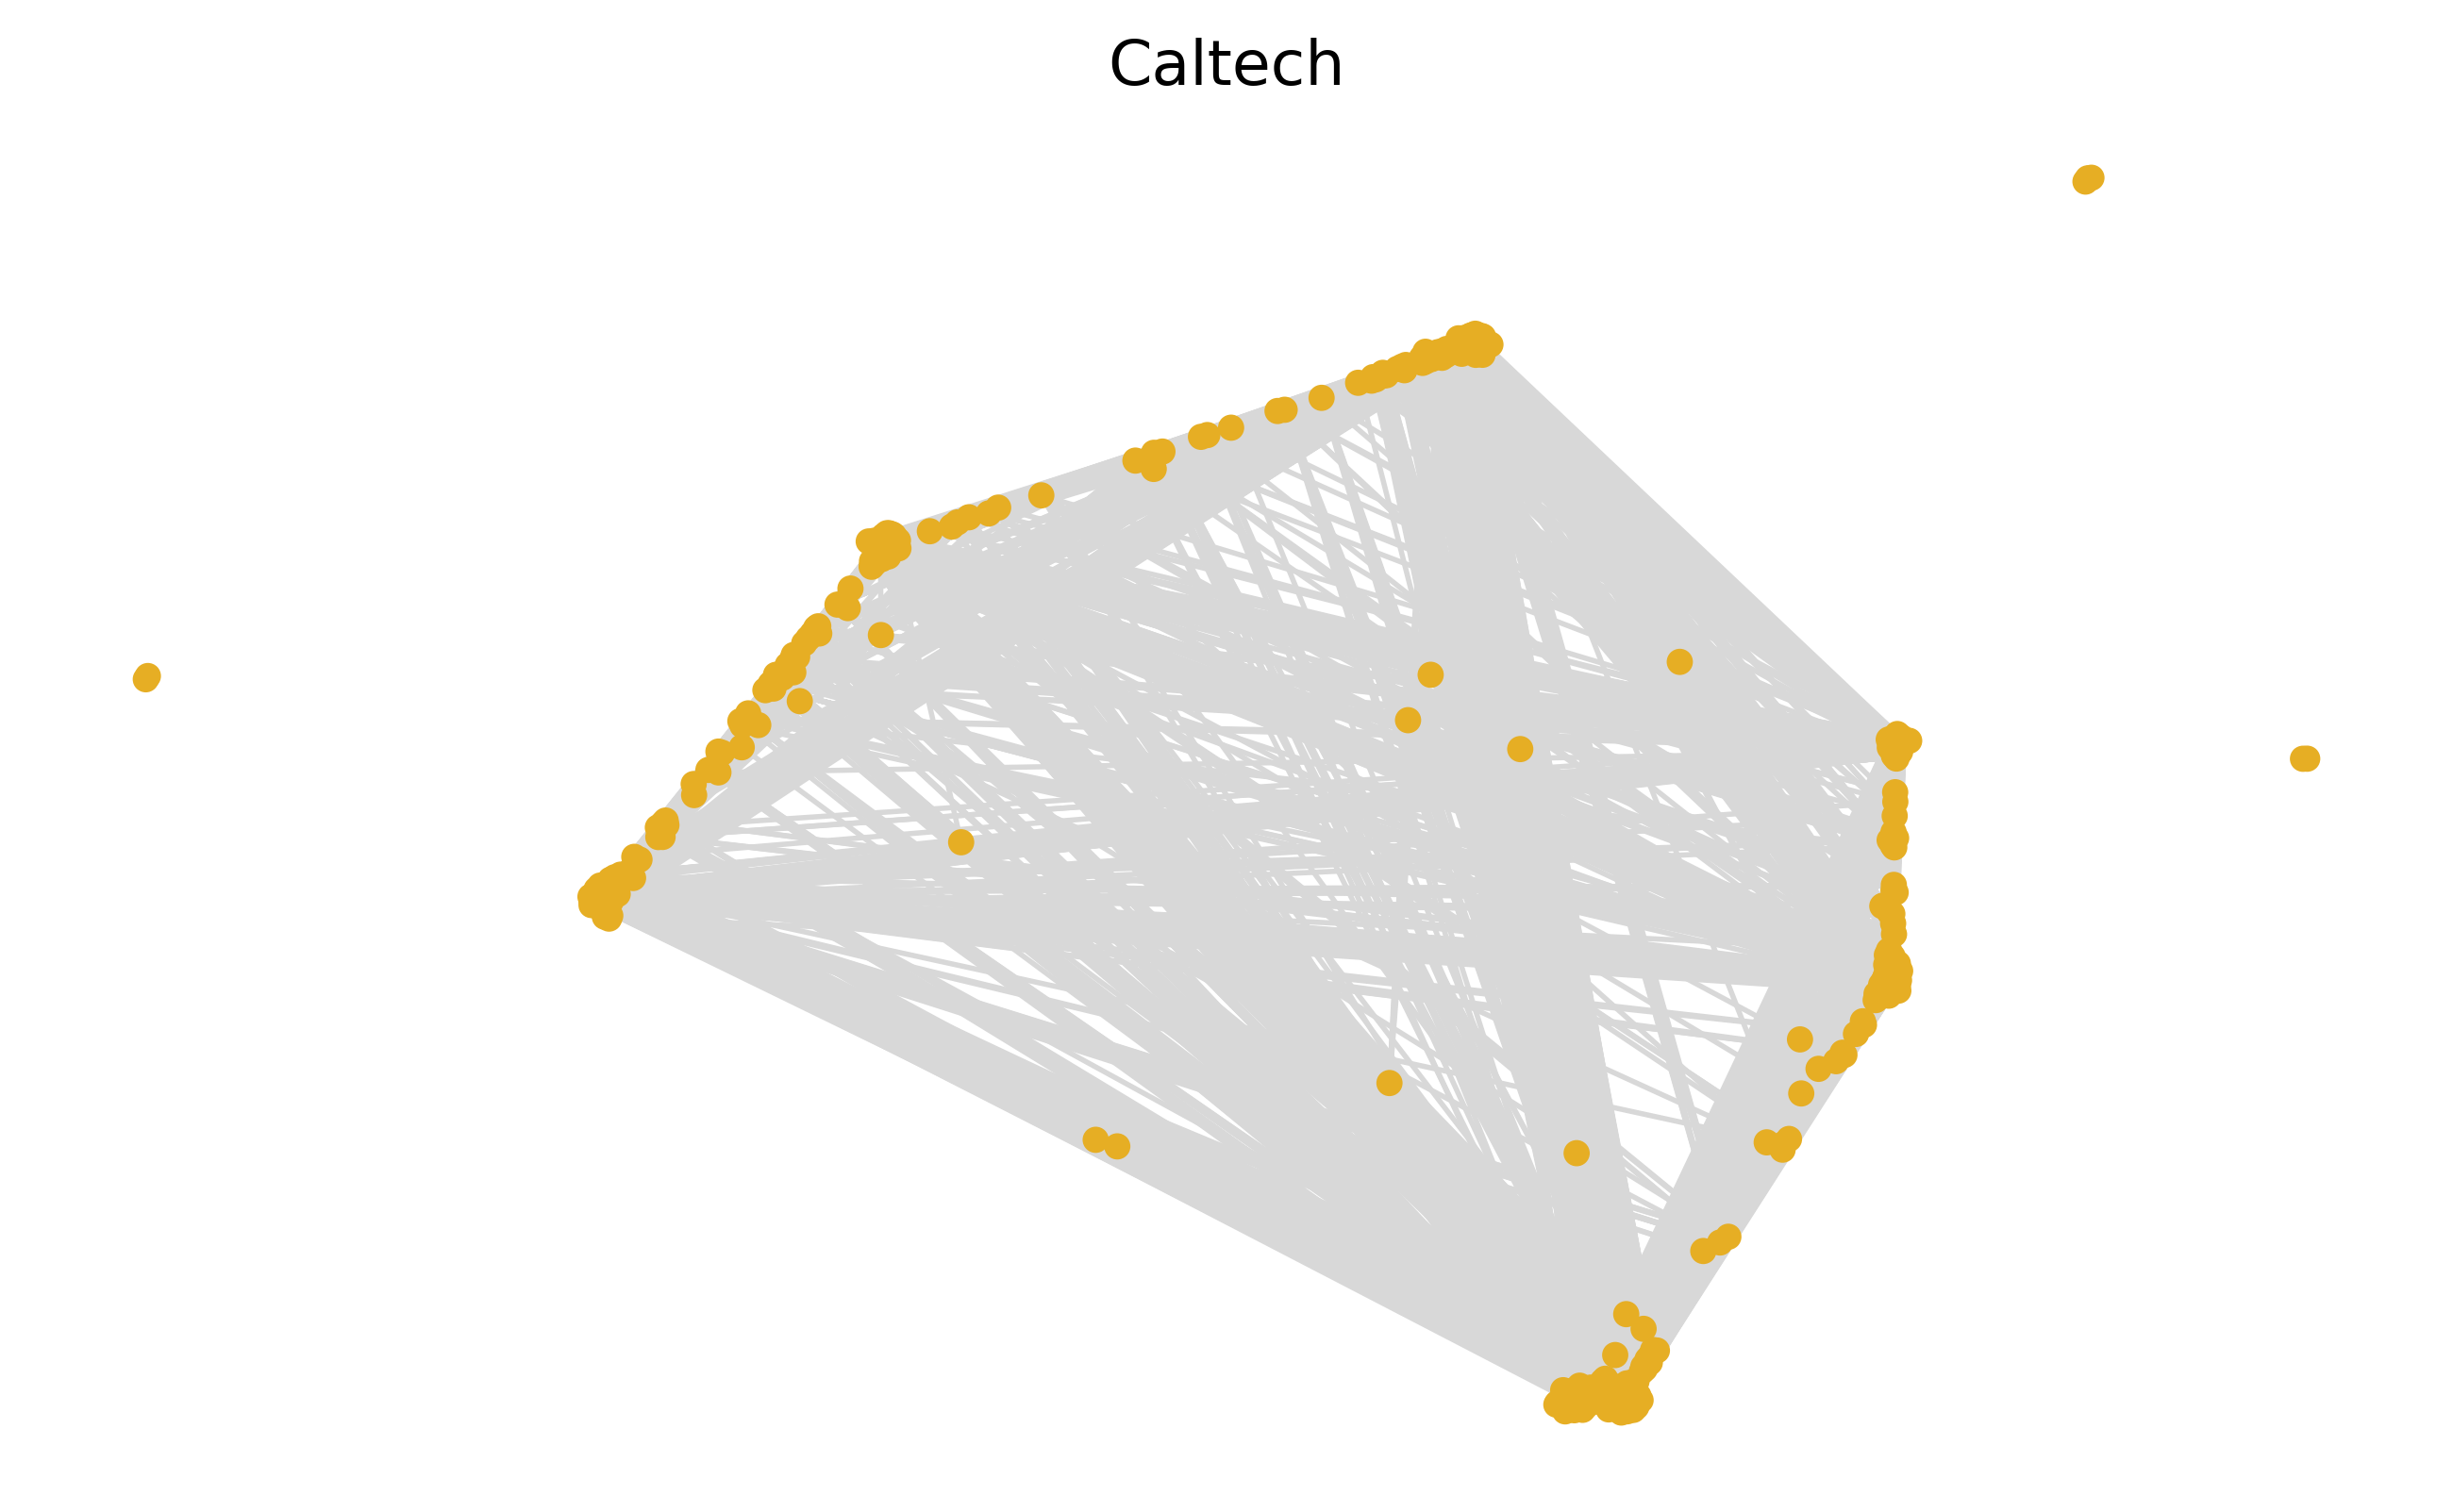

In [20]:
np.random.seed(1234)
f = plt.figure(figsize = (7,4), dpi = 400)
axes = f.add_axes([0.1,0.1,0.9,0.9])
arguments = {
    'vertex_color':'#E6AE24',
    'edge_color':'#D8D8D8'
}
gr.plot(caltech, layout = caltech.layout('drl'), target = axes, vertex_size = 4, **arguments)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xticks([])
axes.set_yticks([])
axes.set_title('Caltech')
plt.show()

## 5 Decoración

Si bien la posición de los vértices y la ubicación de las aristas es claramente importante en la visualización de grafos, la **información adicional se puede incorporar en las visualizaciones** variando características como el **tamaño**, la **forma** y el **color** de los **vértices** y las **aristas**.


### 5.1 Ejemplo: Lazega

In [21]:
# data (agregamos las covariables)
lazega_attr_np = np.genfromtxt('LazegaLawyers/ELattr.dat', delimiter = ' ')
lazega_attr = pd.DataFrame(data = lazega_attr_np, columns = ['Seniority', 'Status', 'Gender', 'Office', 'Years', 'Age', 'Practice', 'School'])
lazega_attr = lazega_attr[:36]
lazega_attr.drop(labels = [7,22])
for col in lazega_attr.columns:
    lazega.vs[col] = lazega_attr[col]
visual_style = {}
# color: ubicacion de la oficina
visual_style['vertex_color'] = np.array(['red','#3392FA','#DEA221'])[np.array(lazega.vs['Office'], dtype = int)-1]
# forma del vertice: tipo de practica
visual_style['vertex_shape'] = np.array(['circle','rectangle'])[np.array(lazega.vs['Practice'], dtype = int)-1]
# tamaño del vertice: proporcional a años de servicio
visual_style['vertex_size'] = 6.5*np.sqrt(lazega.vs['Years'])
# etiquetas
visual_style['vertex_label'] = np.array(lazega.vs['Seniority'],dtype=int)
# diseño
np.random.seed(42)
l = lazega.layout('fr')
list(l)[:6]

[[2.048892273319906, -3.9841253499266975],
 [-0.9683204900505812, -0.09981735805350236],
 [3.435386527932441, 2.0229516316817344],
 [0.6431611138983437, -0.5194532523297439],
 [1.8142175474764064, 2.1004894122087436],
 [2.437648212475018, 1.5721248856247614]]

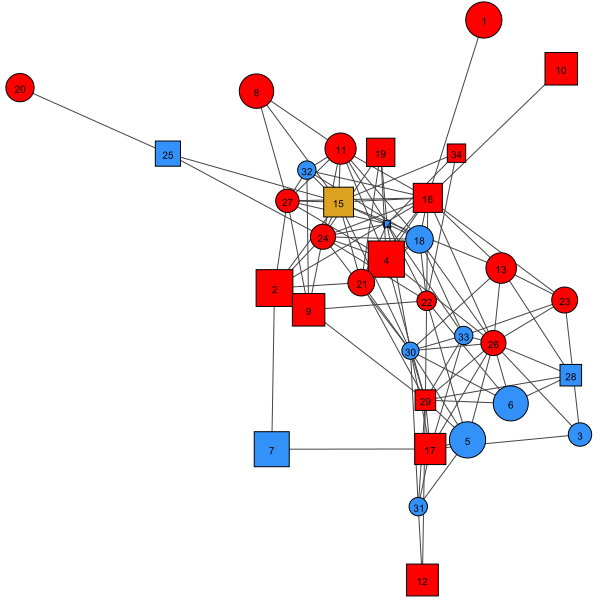

In [22]:
# grafico
gr.plot(lazega,layout = l, vertex_label_size = 10, **visual_style)

### 5.2 Ejemplo: Zachary

Los nodos representan a los **miembros de un club de karate** observado durante un periodo de 2 años.

Los enlaces indican interacciones sociales entre los miembros del club. 

Este conjunto de datos es importante desde un punto de vista científico, dada la fragmentación que sufrió el club en dos clubes diferentes debido a una disputa entre el director y el administrador.

***Zachary, W. W. (1977). An information flow model for conflict and fission in small groups. Journal of anthropological research, 33(4), 452-473.***

Disponible en el paquete `igraphdata` de R.

https://rdrr.io/cran/igraphdata/man/karate.html

https://github.com/igraph/igraphdata


In [23]:
# data
karate = gr.Graph.from_networkx(nx.karate_club_graph())
# Arreglar nombres
tmp_names = ['Actor '+str(i+1) for i in range(karate.vcount())]
tmp_names[0] = "Mr. Hi"
tmp_names[33] = "John A"
karate.vs['name'] = tmp_names
# Aquí el atributo Faction de R se llama club. 
# El Actor 9 pertenece a la facción de Mr Hi en vez de la de John A. 
# Cambiaremos esto último para que los resultados obtenidos aquí coincidan con los obtenidos en el Rmd.
karate.vs.select(name = 'Actor 9')['club'] = 'Officer'
# orden
karate.vcount()

34

In [24]:
# tamaño
karate.ecount()

78

In [25]:
# dirigida?
karate.is_directed()

False

In [26]:
# ponderada?
karate.is_weighted()

False

Lazega


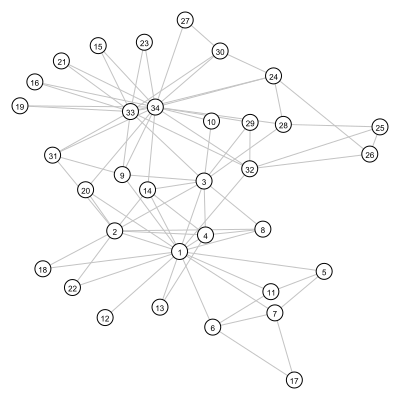

In [27]:
# diseño
np.random.seed(1234)
l = karate.layout('kk')
# grafico (no decorado)
visual_style = {
    'vertex_label':range(1,karate.vcount()+1),
    'vertex_label_size':8,
    'vertex_size':16,
    'vertex_color':'white',
    'edge_color':'#c3c3c3'
}
print('Lazega')
gr.plot(karate,layout = l,bbox = (400,400),**visual_style)

Lazega


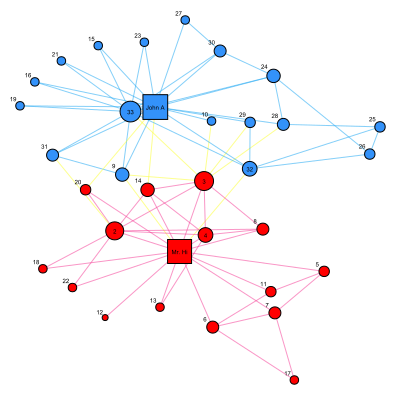

In [32]:
# decorar grafico
visual_style = {
    # etiquetas
    'vertex_label':['Mr. Hi'] + list(range(2,34)) + ['John A'],
    # forma del vertice
    'vertex_shape':['rectangle'] + ['circle']*32 + ['rectangle'],
    # color del vertice
    'vertex_color':['red' if v['club'] == 'Mr. Hi' else '#3392FA' for v in karate.vs],
    # tamaño vertice
    'vertex_size':6*np.sqrt(karate.strength()),
    # grosor de aristas
    #'edge_width':karate.es['weight']
    # posicion etiquetas
    #'vertex_label_dist':[0] + [1.5]*32 + [0]
}
# color de aristas
edge_col = []
for e in karate.es:
    if e in karate.es.select(_within = karate.vs.select(club = 'Mr. Hi')):
        edge_col.append('#F5459A90')
    elif e in karate.es.select(_within = karate.vs.select(club = 'Officer')):
        edge_col.append('#27ABF290')
    else:
        edge_col.append('#FBFF3B90')
visual_style['edge_color'] = edge_col
# posicion etiquetas
visual_style['vertex_label_dist'] = [0 if v>27/2 else 1.5 for v in visual_style['vertex_size']]
print('Lazega')
gr.plot(karate, layout = l, vertex_label_size = 6, bbox = (400,400), vertex_label_angle = np.pi*3/4, **visual_style)

Ego-network actor 1


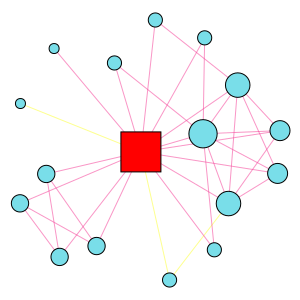

In [34]:
# egonetworks
k_1 = karate.subgraph(karate.neighborhood(0))
k_34 = karate.subgraph(karate.neighborhood(33))
# grafico
visual_style = {
    'vertex_color':['red'] + ['#79DEE9']*(k_1.vcount()-1),
    'vertex_shape':['rectangle'] + ['circle']*(k_1.vcount()-1),
    'vertex_size':10*np.sqrt(k_1.strength()),
    #'edge_width':k_1.es['weight'],
}
edge_col = []
for e in k_1.es:
    if e in k_1.es.select(_within = k_1.vs.select(club = 'Mr. Hi')):
        edge_col.append('#F5459A90')
    elif e in k_1.es.select(_within = k_1.vs.select(club = 'Officer')):
        edge_col.append('#27ABF290')
    else:
         edge_col.append('#FBFF3B90')
visual_style['edge_color'] = edge_col
#
print("Ego-network actor 1")
gr.plot(k_1,bbox = (300,300),**visual_style)

Ego-network actor 34


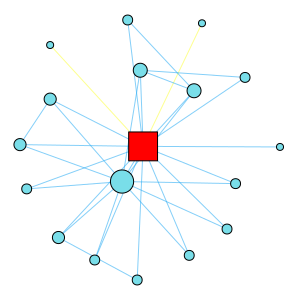

In [35]:
# grafico
visual_style = {
    'vertex_color':['#79DEE9']*(k_34.vcount()-1) + ['red'],
    'vertex_shape':['circle']*(k_34.vcount()-1) + ['rectangle'],
    'vertex_size':7*np.sqrt(k_34.strength()),
    #'edge_width':k_34.es['weight'],
}
edge_col = []
for e in k_34.es:
    if e in k_34.es.select(_within = k_34.vs.select(club = 'Mr. Hi')):
        edge_col.append('#F5459A90')
    elif e in k_34.es.select(_within = k_34.vs.select(club = 'Officer')):
        edge_col.append('#27ABF290')
    else:
         edge_col.append('#FBFF3B90')
visual_style['edge_color'] = edge_col
#
print("Ego-network actor 34")
gr.plot(k_34,bbox = (300,300),**visual_style)

### 5.3 Ejemplo: Blogs de política

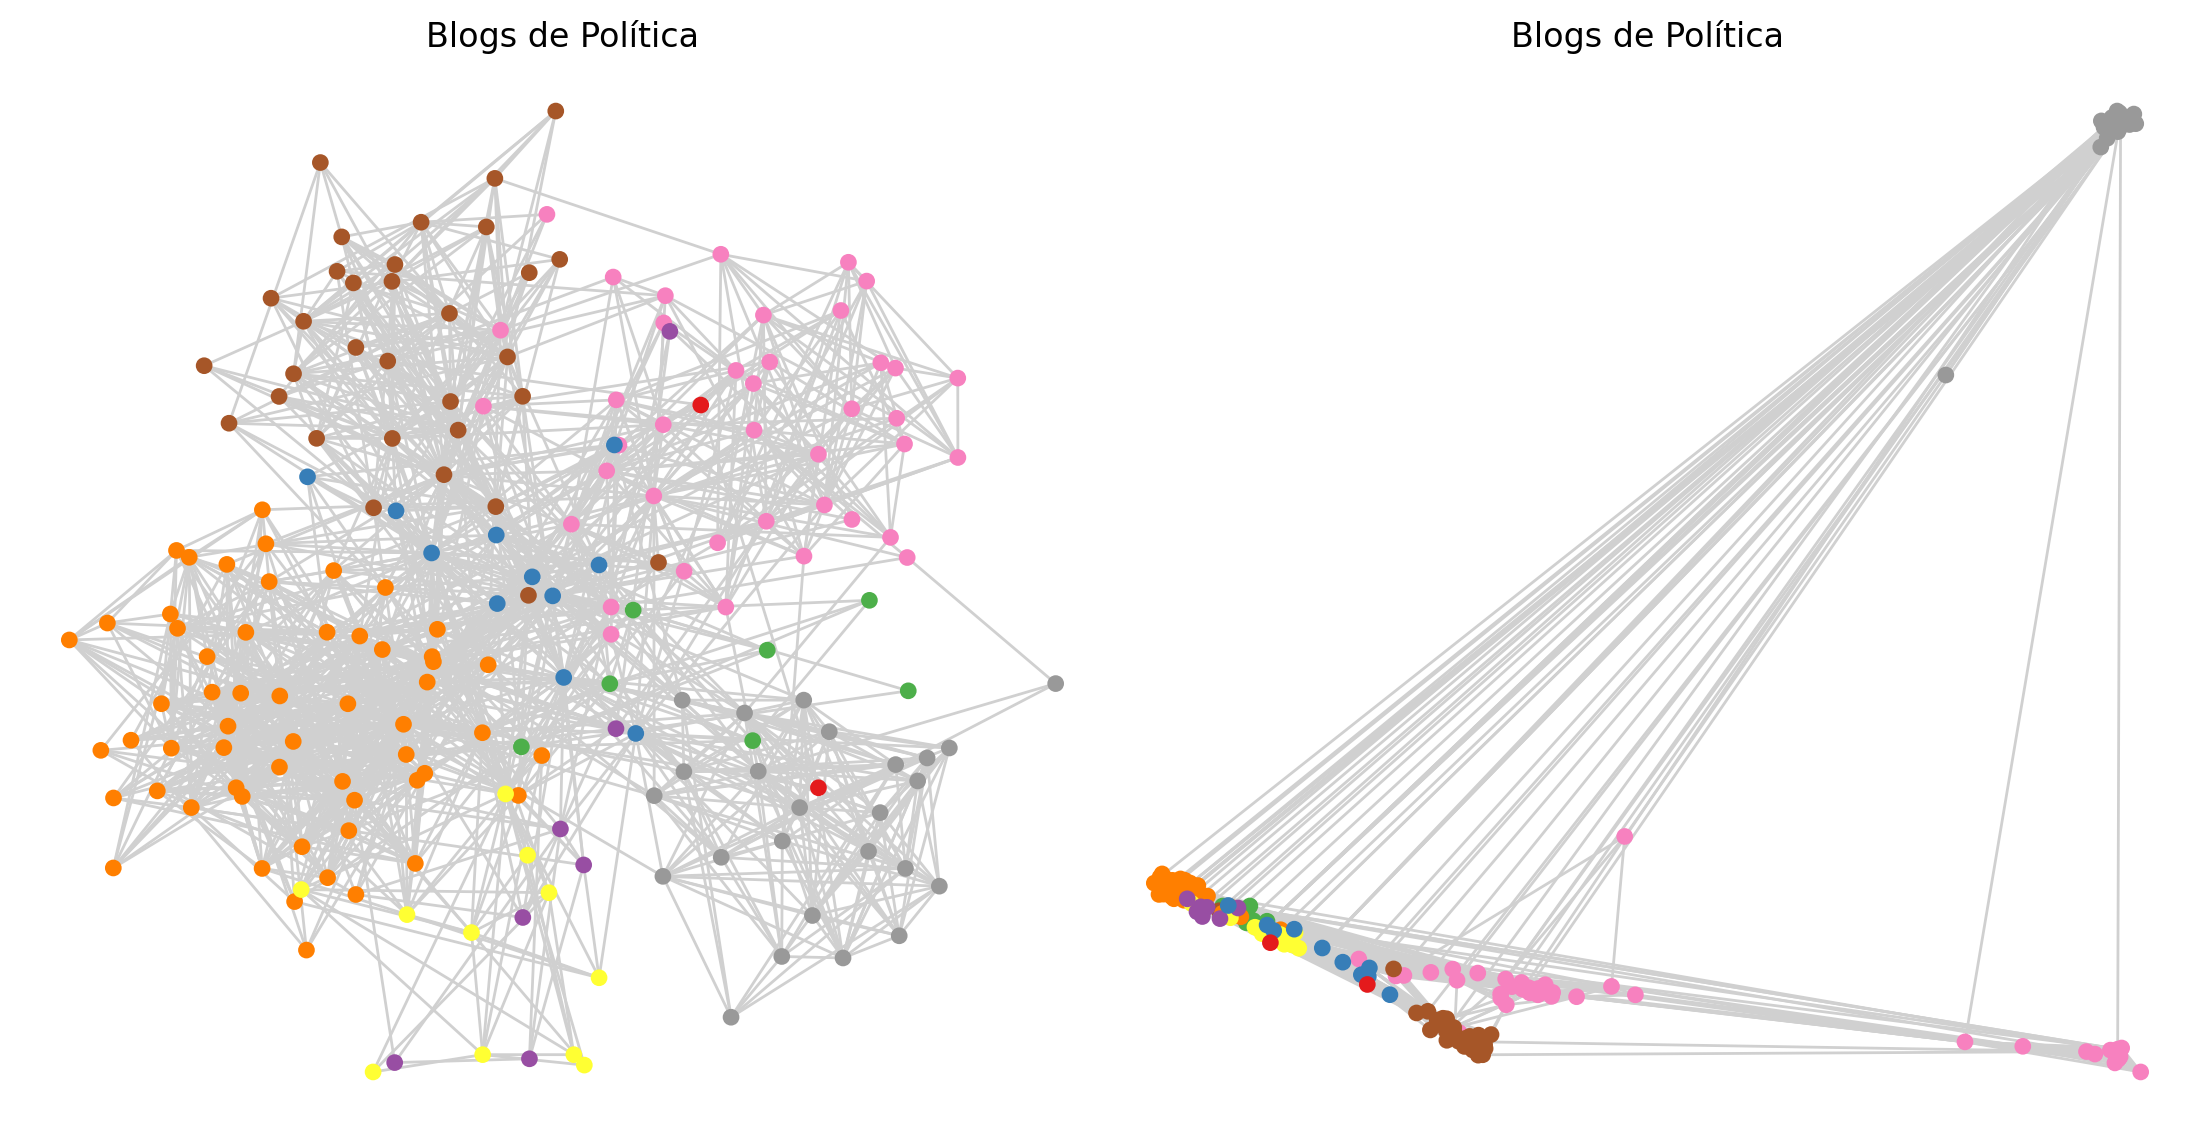

In [37]:
f, axes = plt.subplots(1, 2, figsize = (14,7), dpi = 200, clear=True)
plt.subplots_adjust(wspace = 0, hspace = 0)
clean_plot_axes(axes)
# color de vertices
cols = sns.color_palette("Set1", n_colors = 9)
party_nums = pd.DataFrame(fblog.vs['PolParty'])[0].astype('category').cat.codes
visual_style = {}
visual_style['vertex_color'] = np.array(cols)[party_nums]
visual_style['edge_color'] = '#d0d0d090'
# grafico con Kamada-Kawai 
# Nota: Sí es posible establecer una semilla para los gráficos en igraph pero esta 
# no debe ser un entero sino que debe ser una matriz de coordenadas para los vértices.
axes[0].set_title('Blogs de Política')
gr.plot(fblog, layout = fblog.layout('kk'), target = axes[0], **visual_style)
# grafico con DrL
axes[1].set_title('Blogs de Política')
gr.plot(fblog, layout = fblog.layout('drl'), target = axes[1], **visual_style)

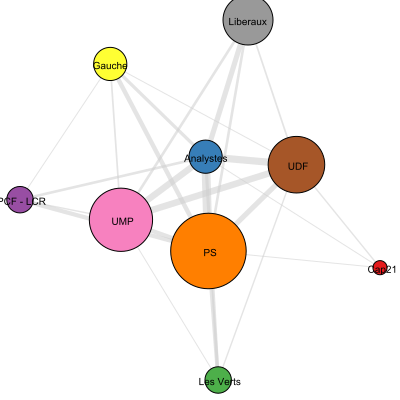

In [38]:
# contraccion
party_nums = pd.DataFrame(fblog.vs['PolParty'])[0].astype('category').cat.codes
fblog_c = fblog.copy()
fblog_c.contract_vertices(party_nums,combine_attrs = 'first')
fblog_c.es['weight'] = [1]*fblog_c.vcount()
fblog_c.simplify(combine_edges = 'sum')
# grafico
visual_style = {
    'vertex_label':fblog_c.vs['PolParty'],
    'vertex_size': 10*np.sqrt(pd.DataFrame(fblog.vs['PolParty']).value_counts(sort = False)),
    'vertex_color':cols,
    'edge_width':np.sqrt(fblog_c.es['weight']),
    'edge_color':'#d0d0d090'
}
visual_style['vertex_label'][1] = "Analystes"
visual_style['vertex_label'][5] = "Gauche"
visual_style['vertex_label'][8] = "Liberaux"
#
gr.plot(fblog_c,vertex_label_size = 10,bbox=(400,400),**visual_style)

## Referencias

![](KCbookcover1.jpg)